# Import Lib

In [31]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import functions
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spark = SparkSession.builder \
    .appName("EDA") \
    .master("local[*]") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

# Import data

In [5]:
path = "../dataset/cooked/1 Dataset"

df = spark.read.csv(path, header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- store_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- wm_yr_wk: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- dept_id: string (nullable = true)
 |-- cat_id: string (nullable = true)
 |-- state_id: string (nullable = true)
 |-- d_code: string (nullable = true)
 |-- sales: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- sell_price: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- week: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)

+--------+-----------+--------+--------------------+-------+------+--------+------+-----+----------+----------+-----------+----+-----+----+
|store_id|    item_id|wm_yr_wk|                  id|dept_id|cat_id|state_id|d_code|sales|      date|sell_price|day_of_week|week|month|year|
+--------+-----------+--------+--------------------+-------+------+--------+------+-----+----------+----------+-----------+----+-----+-

# Deskripsi Data

In [6]:
df.count()
df.printSchema()
df.describe().show()

root
 |-- store_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- wm_yr_wk: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- dept_id: string (nullable = true)
 |-- cat_id: string (nullable = true)
 |-- state_id: string (nullable = true)
 |-- d_code: string (nullable = true)
 |-- sales: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- sell_price: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- week: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)

+-------+--------+---------------+------------------+--------------------+-----------+---------+--------+--------+-----------------+-----------------+------------------+------------------+------------------+-----------------+
|summary|store_id|        item_id|          wm_yr_wk|                  id|    dept_id|   cat_id|state_id|  d_code|            sales|       sell_price|       day_of_week|              week| 

# cek Missing Value
sell price memang kosong, memang item tersebut tidak terjual pada hari itu, makanya null

In [7]:
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+--------+-------+--------+---+-------+------+--------+------+-----+----+----------+-----------+----+-----+----+
|store_id|item_id|wm_yr_wk| id|dept_id|cat_id|state_id|d_code|sales|date|sell_price|day_of_week|week|month|year|
+--------+-------+--------+---+-------+------+--------+------+-----+----+----------+-----------+----+-----+----+
|       0|      0|       0|  0|      0|     0|       0|     0|    0|   0|  12299413|          0|   0|    0|   0|
+--------+-------+--------+---+-------+------+--------+------+-----+----+----------+-----------+----+-----+----+



# Disctribusi "sales"

In [8]:
df.select("sales").describe().show()

+-------+-----------------+
|summary|            sales|
+-------+-----------------+
|  count|         58327370|
|   mean|1.126322153733316|
| stddev|3.873108446471982|
|    min|                0|
|    max|              763|
+-------+-----------------+



In [9]:
df.orderBy(df.sales.desc()).show(10)

+--------+---------------+--------+--------------------+-----------+---------+--------+------+-----+----------+----------+-----------+----+-----+----+
|store_id|        item_id|wm_yr_wk|                  id|    dept_id|   cat_id|state_id|d_code|sales|      date|sell_price|day_of_week|week|month|year|
+--------+---------------+--------+--------------------+-----------+---------+--------+------+-----+----------+----------+-----------+----+-----+----+
|    CA_3|    FOODS_3_090|   11334|FOODS_3_090_CA_3_...|    FOODS_3|    FOODS|      CA| d_960|  763|2013-09-14|       1.0|          7|  37|    9|2013|
|    CA_3|    FOODS_3_090|   11333|FOODS_3_090_CA_3_...|    FOODS_3|    FOODS|      CA| d_959|  709|2013-09-13|       1.0|          6|  37|    9|2013|
|    CA_3|    FOODS_3_090|   11330|FOODS_3_090_CA_3_...|    FOODS_3|    FOODS|      CA| d_938|  709|2013-08-23|       1.0|          6|  34|    8|2013|
|    CA_3|    FOODS_3_090|   11149|FOODS_3_090_CA_3_...|    FOODS_3|    FOODS|      CA| d_337|

# Time Series

### Per Tahun

In [10]:
df.groupBy("year").sum("sales").orderBy("year").show()

+----+----------+
|year|sum(sales)|
+----+----------+
|2011|   8856585|
|2012|  12061837|
|2013|  13135753|
|2014|  13089776|
|2015|  13800811|
|2016|   4750647|
+----+----------+



### Per Bulan

In [11]:
df.groupBy("year", "month").sum("sales").orderBy("year", "month").show()

+----+-----+----------+
|year|month|sum(sales)|
+----+-----+----------+
|2011|    1|     88163|
|2011|    2|    726375|
|2011|    3|    763567|
|2011|    4|    737713|
|2011|    5|    719562|
|2011|    6|    753380|
|2011|    7|    819820|
|2011|    8|    825694|
|2011|    9|    813683|
|2011|   10|    898243|
|2011|   11|    823087|
|2011|   12|    887298|
|2012|    1|    893375|
|2012|    2|    897990|
|2012|    3|    986894|
|2012|    4|    944858|
|2012|    5|    997746|
|2012|    6|   1095609|
|2012|    7|   1080777|
|2012|    8|   1102780|
+----+-----+----------+
only showing top 20 rows



### Per Minggu

In [12]:
df.groupBy("day_of_week").avg("sales").orderBy("day_of_week").show()

+-----------+------------------+
|day_of_week|        avg(sales)|
+-----------+------------------+
|          1|1.3489675925815092|
|          2|1.0774997387001324|
|          3| 0.996024277460814|
|          4|0.9842578543136103|
|          5|0.9906529132832839|
|          6|1.1225314971461249|
|          7|1.3626400183858296|
+-----------+------------------+



# Analisis Harga

In [13]:
df.groupBy("sell_price").avg("sales").orderBy("sell_price").show()

+----------+-------------------+
|sell_price|         avg(sales)|
+----------+-------------------+
|      NULL|                0.0|
|      0.01| 0.2261904761904762|
|      0.02|                3.5|
|      0.05| 11.665620094191523|
|      0.06| 15.142857142857142|
|      0.07|  8.864168618266978|
|      0.08|   8.53826530612245|
|      0.09| 0.5892857142857143|
|       0.1|  2.434593023255814|
|      0.12| 1.4285714285714286|
|      0.13|                4.0|
|      0.15|  3.238095238095238|
|      0.16|  3.059299191374663|
|      0.17| 3.4285714285714284|
|      0.18|0.14285714285714285|
|      0.19| 1.5714285714285714|
|       0.2|  8.826554358794818|
|      0.22|0.01020408163265306|
|      0.23|  0.882796812248996|
|      0.24|0.02040816326530612|
+----------+-------------------+
only showing top 20 rows



# Analsis Store & Departemen

### Per Store

In [14]:
df.groupBy("store_id").sum("sales").orderBy("store_id").show()


+--------+----------+
|store_id|sum(sales)|
+--------+----------+
|    CA_1|   7698216|
|    CA_2|   5685475|
|    CA_3|  11188180|
|    CA_4|   4103676|
|    TX_1|   5595292|
|    TX_2|   7214384|
|    TX_3|   6089330|
|    WI_1|   5149062|
|    WI_2|   6544012|
|    WI_3|   6427782|
+--------+----------+



### Per Departemen

In [15]:
df.groupBy("dept_id").sum("sales").orderBy("dept_id").show()


+-----------+----------+
|    dept_id|sum(sales)|
+-----------+----------+
|    FOODS_1|   5088041|
|    FOODS_2|   7629822|
|    FOODS_3|  32372076|
|  HOBBIES_1|   5596460|
|  HOBBIES_2|    528340|
|HOUSEHOLD_1|  11500526|
|HOUSEHOLD_2|   2980144|
+-----------+----------+



# Visualisasi Data

### Plot time series

In [ ]:
panda = df.sample(False, 0.001).toPandas()

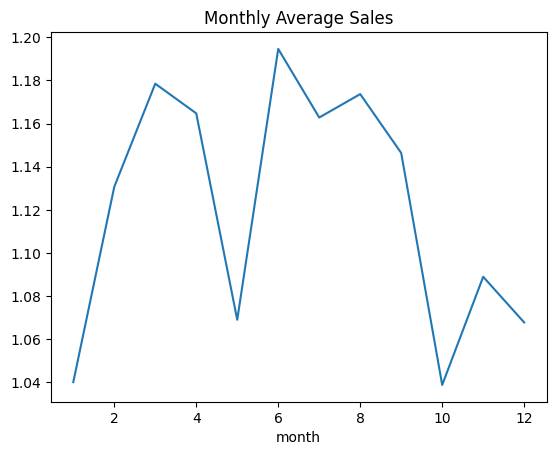

In [ ]:
panda.groupby("month")["sales"].mean().plot(kind="line")
plt.title("Mean Bulanan Sales")
plt.show()
# plot hanya ilustrasi, karena data yang diambil cuma 0.002 saja

### Box plot

<Axes: >

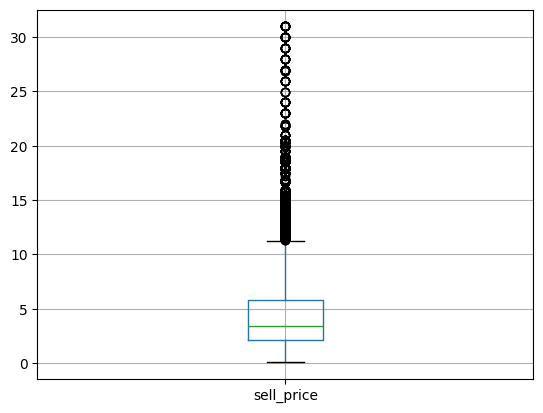

In [21]:
panda[["sell_price"]].boxplot()


### Sales vs sell_price

In [22]:
df.groupBy("sell_price") \
  .avg("sales") \
  .orderBy("sell_price") \
  .show()


+----------+-------------------+
|sell_price|         avg(sales)|
+----------+-------------------+
|      NULL|                0.0|
|      0.01| 0.2261904761904762|
|      0.02|                3.5|
|      0.05| 11.665620094191523|
|      0.06| 15.142857142857142|
|      0.07|  8.864168618266978|
|      0.08|   8.53826530612245|
|      0.09| 0.5892857142857143|
|       0.1|  2.434593023255814|
|      0.12| 1.4285714285714286|
|      0.13|                4.0|
|      0.15|  3.238095238095238|
|      0.16|  3.059299191374663|
|      0.17| 3.4285714285714284|
|      0.18|0.14285714285714285|
|      0.19| 1.5714285714285714|
|       0.2|  8.826554358794818|
|      0.22|0.01020408163265306|
|      0.23|  0.882796812248996|
|      0.24|0.02040816326530612|
+----------+-------------------+
only showing top 20 rows

